In [1]:
#loading important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csv data
df=pd.read_csv('/content/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.notnull().count()

Age                           583
Gender                        583
Total_Bilirubin               583
Direct_Bilirubin              583
Alkaline_Phosphotase          583
Alamine_Aminotransferase      583
Aspartate_Aminotransferase    583
Total_Protiens                583
Albumin                       583
Albumin_and_Globulin_Ratio    583
Dataset                       583
dtype: int64

In [4]:
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df1=df.drop_duplicates()
df1.duplicated().sum()

0

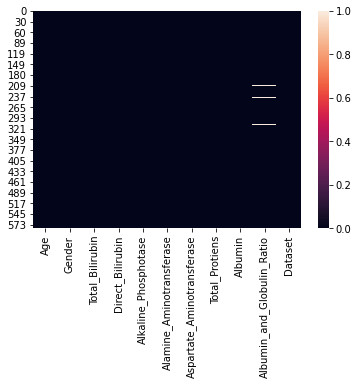

In [7]:
sns.heatmap(df1.isnull())

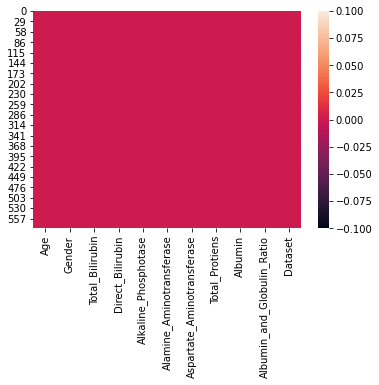

In [8]:
df1=df1.dropna()
sns.heatmap(df1.isnull())


In [9]:
df1.rename(columns={'liver_disease':'liver_disease'},inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         566 non-null    int64  
 1   Gender                      566 non-null    object 
 2   Total_Bilirubin             566 non-null    float64
 3   Direct_Bilirubin            566 non-null    float64
 4   Alkaline_Phosphotase        566 non-null    int64  
 5   Alamine_Aminotransferase    566 non-null    int64  
 6   Aspartate_Aminotransferase  566 non-null    int64  
 7   Total_Protiens              566 non-null    float64
 8   Albumin                     566 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     566 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.1+ KB


[]

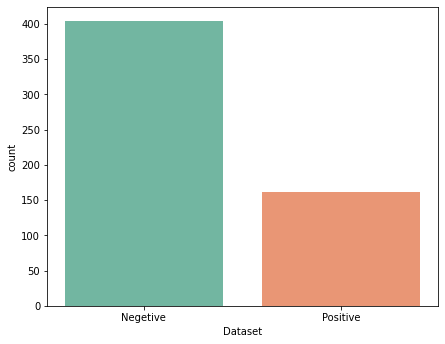

In [11]:
plt.figure(figsize=(7,5.5))
sns.countplot(x='Dataset',data=df1,palette='Set2')
plt.xticks(ticks=[0,1],labels=['Negetive','Positive'])
plt.plot()

In [12]:
male_postive=df1.loc[(df1.Gender=='Male') & (df1.Dataset==1)].value_counts().count()
print(f'No of males having liver disease is {male_postive}')
female_positive=df1.loc[(df1.Gender=='Female') & (df1.Dataset==1)].value_counts().count()
print(f'No of females having liver disease is {female_positive}')

No of males having liver disease is 314
No of females having liver disease is 90


[]

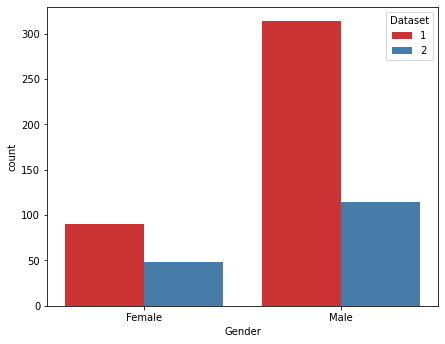

In [13]:
plt.figure(figsize=(7,5.5))
sns.countplot(x='Gender',data=df1,palette='Set1',hue='Dataset')

plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


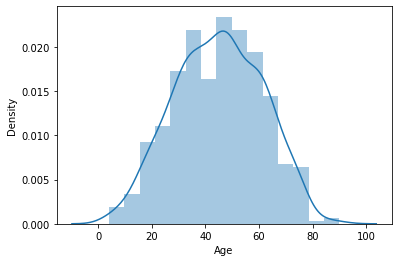

In [14]:
#Age distribution
sns.distplot(a=df1['Age'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


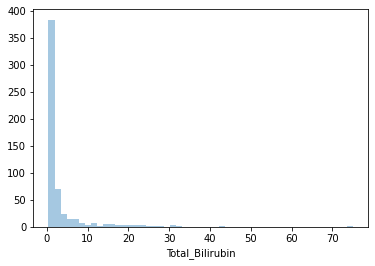

In [15]:
sns.distplot(a=df1['Total_Bilirubin'],kde=False)

In [16]:
#no of adults having jaundice
adults_having_jaundice=df1.loc[(df1.Age>=18) & (df1.Total_Bilirubin	>2.5)].value_counts().count()
print(f'No of adults having jaundice are {adults_having_jaundice}')

No of adults having jaundice are 142


In [17]:
#Mean of data points
df1.mean()

Age                            44.886926
Total_Bilirubin                 3.338869
Direct_Bilirubin                1.505830
Alkaline_Phosphotase          292.567138
Alamine_Aminotransferase       80.143110
Aspartate_Aminotransferase    109.892226
Total_Protiens                  6.494876
Albumin                         3.145583
Albumin_and_Globulin_Ratio      0.948004
Dataset                         1.286219
dtype: float64

In [18]:
#Skewness
df1.skew()

Age                           -0.050998
Total_Bilirubin                4.852444
Direct_Bilirubin               3.174186
Alkaline_Phosphotase           3.716540
Alamine_Aminotransferase       6.672512
Aspartate_Aminotransferase    10.524552
Total_Protiens                -0.317937
Albumin                       -0.065818
Albumin_and_Globulin_Ratio     1.001294
Dataset                        0.948463
dtype: float64

In [19]:
df1.kurtosis()

Age                            -0.570584
Total_Bilirubin                36.262008
Direct_Bilirubin               11.021222
Alkaline_Phosphotase           17.236024
Alamine_Aminotransferase       52.345206
Aspartate_Aminotransferase    149.305593
Total_Protiens                  0.272734
Albumin                        -0.375984
Albumin_and_Globulin_Ratio      3.354530
Dataset                        -1.104332
dtype: float64

In [20]:
#median of data points
df1.median()


Age                            45.00
Total_Bilirubin                 1.00
Direct_Bilirubin                0.30
Alkaline_Phosphotase          208.00
Alamine_Aminotransferase       35.00
Aspartate_Aminotransferase     41.00
Total_Protiens                  6.60
Albumin                         3.10
Albumin_and_Globulin_Ratio      0.95
Dataset                         1.00
dtype: float64

In [21]:
df1.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821
Total_Bilirubin,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467
Direct_Bilirubin,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926
Alkaline_Phosphotase,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057
Alamine_Aminotransferase,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617
Aspartate_Aminotransferase,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009
Total_Protiens,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443
Albumin,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273
Albumin_and_Globulin_Ratio,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402
Dataset,-0.133821,-0.224467,-0.250926,-0.186057,-0.161617,-0.151009,0.036443,0.165273,0.171402,1.000000


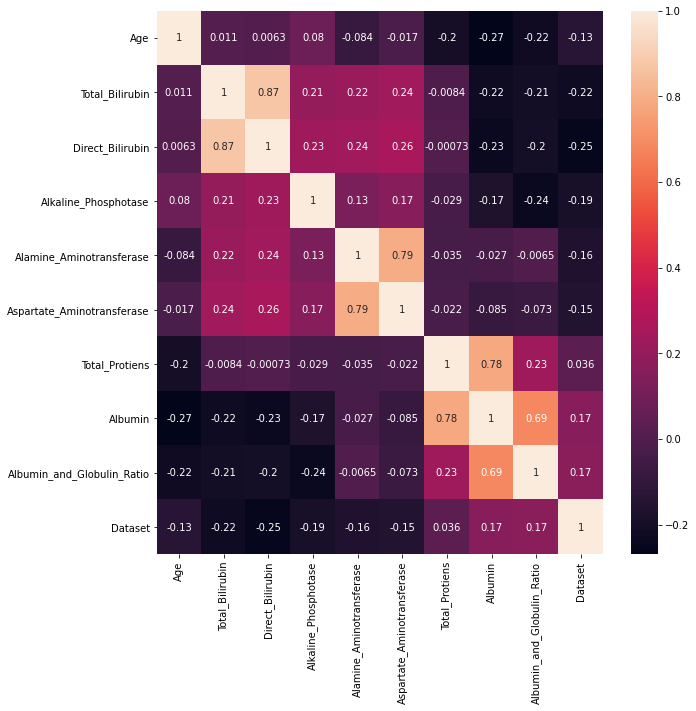

In [22]:
#creating a heatmap using correlation value
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(df1.corr(),annot=True,ax=ax)

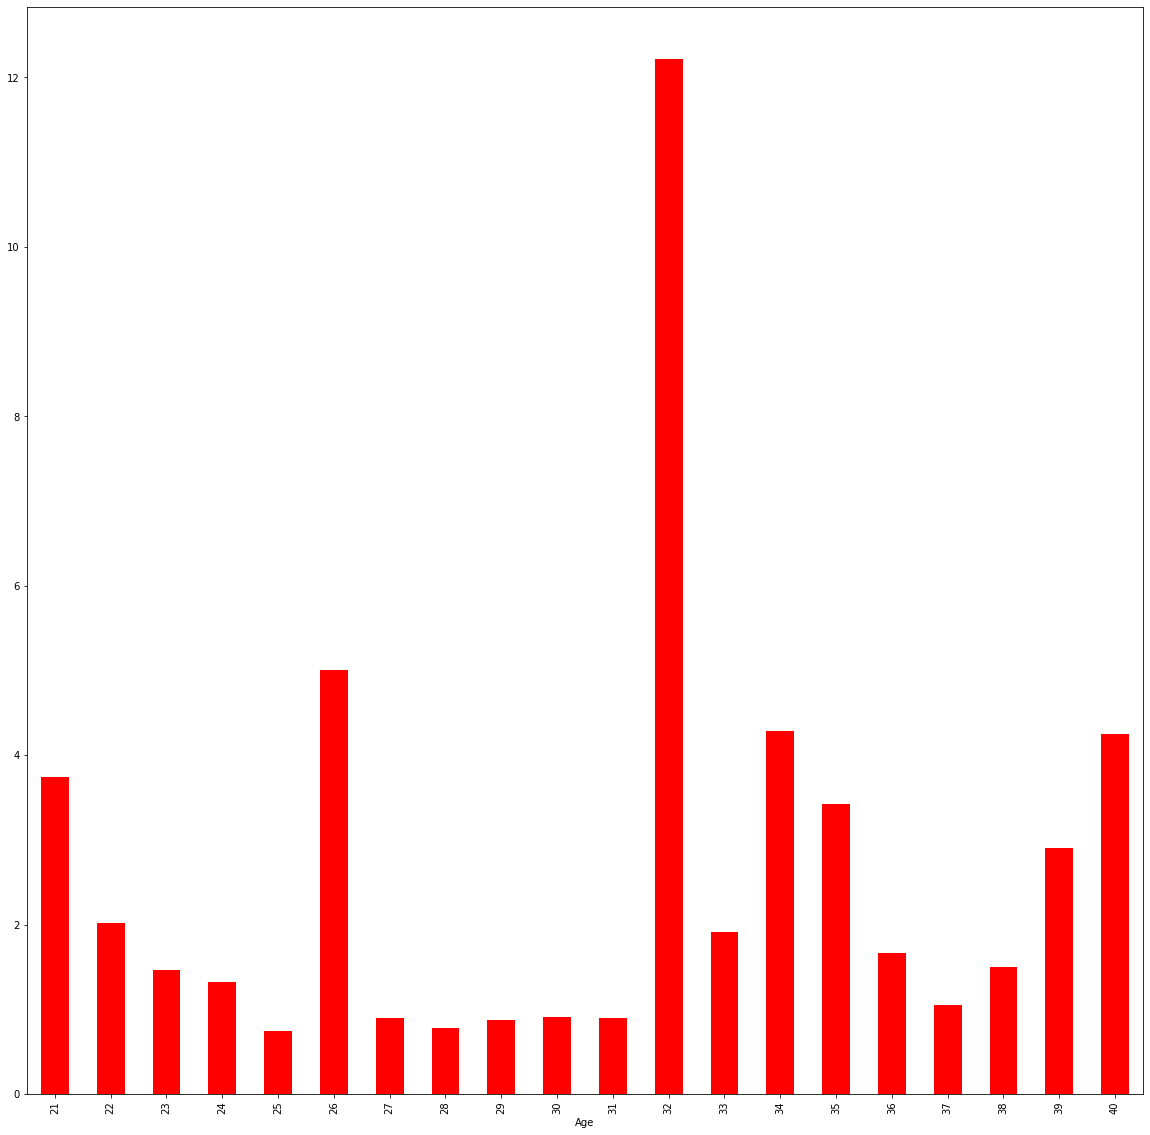

In [23]:
#seeing no of people having jaundice at what age.
df_avg_billirubin=df1.groupby('Age')['Total_Bilirubin'].mean()
df_avg_billirubin[15:35].plot.bar(color='red',figsize=(20,20))

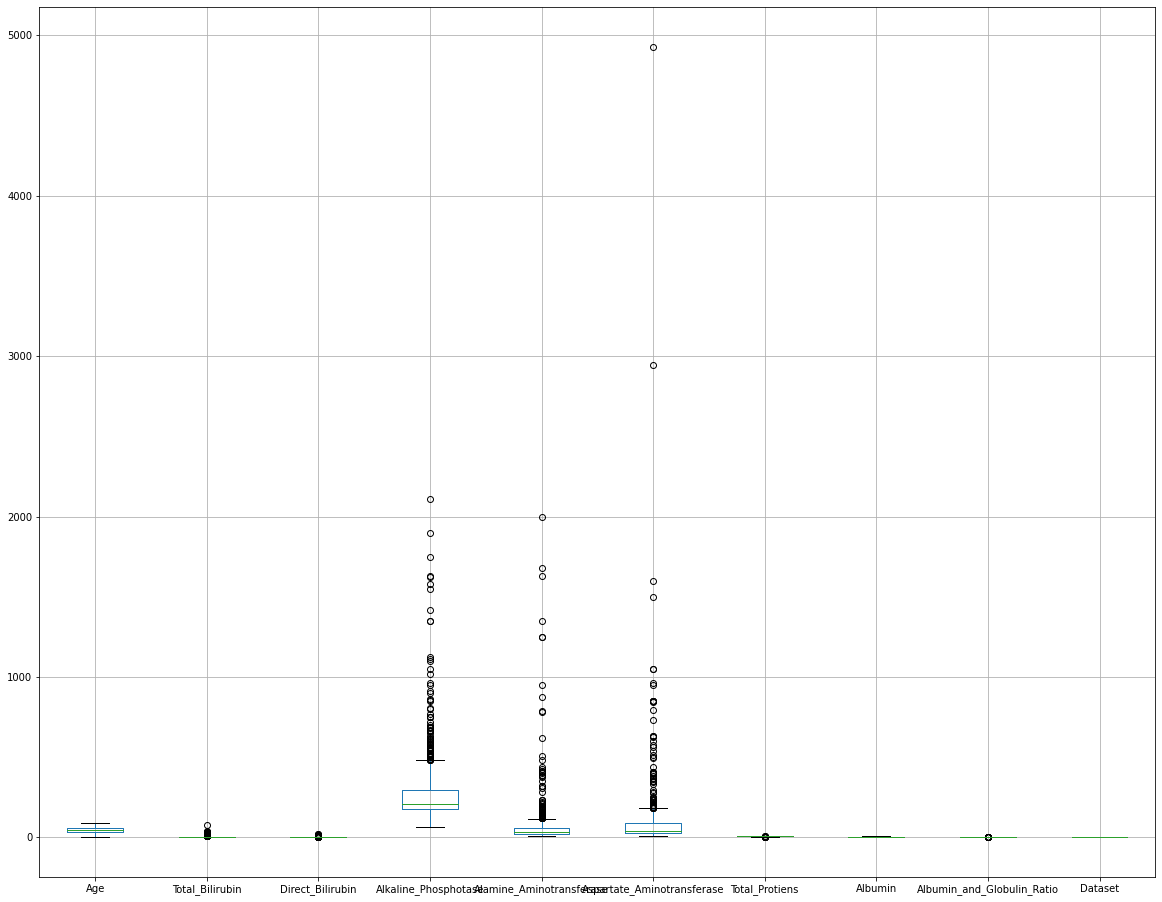

In [24]:
df1.boxplot(figsize=(20,16))

In [25]:
df1=pd.get_dummies(data=df1,drop_first=True)

In [26]:
df1.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold


In [28]:
y=df1['Dataset']


In [29]:
X=df1.drop('Dataset',axis=1)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [31]:
from sklearn.linear_model import LogisticRegression
cv=KFold(n_splits=10,random_state=1,shuffle=True)
model=LogisticRegression()
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))
print(np.median(scores))

0.6945893719806764
0.692512077294686


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 
pipe.score(X_test, y_test)

0.7368421052631579

In [35]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(100)
scores1 = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores1))
print(np.median(scores1))
pipe2=make_pipeline(StandardScaler(),RandomForestClassifier())
pipe2.fit(X_train,y_train)
pipe2.score(X_test,y_test)

0.7079710144927537
0.7111111111111111


0.6842105263157895